# Introduction

Internet access is a factor that impacts sustainability projects. It drives business growth, accelerates economic development, and ultimately it has the potential to improve everyone's lives. 

However, according to the [United Nations Secretary-General's Envoy on Technology]([url](https://www.un.org/techenvoy/content/global-connectivity)), almost half of the world's population currently do not have access to the Internet. [McKinsey & Company]([url](https://www.mckinsey.com/~/media/mckinsey/dotcom/client_service/high%20tech/pdfs/offline_and_falling_behind_full_report.ashx)) estimates that 64% of these offline individuals live in rural areas. And UNESCO's [Broadband Commission for Sustainable Development]([url](https://www.unesco.org/en/digital-policy-capacities-inclusion/broadband-commission)) attributes the lack of power supply in certain rural areas as one of the key issues impacting broadband access development.

As A4AI's report for [Sustainable Universal Access to the Internet]([url](https://a4ai.org/report/sustainable-universal-access-to-the-internet/)) says: "_access to electricity is part of the digital divide_".

# The Question

## _Is Internet access really related to electricity availability and rural populations?_

# Data Sources

[World Bank's Open Data]([url](https://data.worldbank.org/)) is a reliable source of datasets that include helpful indicators for this analysis:

- Individuals using the Internet (% of population): https://data.worldbank.org/indicator/IT.NET.USER.ZS
- Rural population (% of total population): https://data.worldbank.org/indicator/SP.RUR.TOTL.ZS
- Access to electricity (% of population): https://data.worldbank.org/indicator/EG.ELC.ACCS.ZS
- Access to electricity, rural (% of rural population): https://data.worldbank.org/indicator/EG.ELC.ACCS.RU.ZS


# Importing Python Packages

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Importing datasets into DataFrames

In [17]:
#Individuals using the Internet (% of population)
internet_df = pd.read_csv('API_IT.NET.USER.ZS_DS2_en_csv_v2_5455054.csv', skiprows=4) 

#Countries Metadata
countries_df = pd.read_csv('Metadata_Country_API_IT.NET.USER.ZS_DS2_en_csv_v2_5455054.csv')

#Rural population (% of total population)
rural_df = pd.read_csv('API_SP.RUR.TOTL.ZS_DS2_en_csv_v2_5454852.csv', skiprows=4) 

#Access to electricity (% of population)
power_df = pd.read_csv('API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5454975.csv', skiprows=4) 

#Access to electricity, rural (% of rural population)
rural_power_df = pd.read_csv('API_EG.ELC.ACCS.RU.ZS_DS2_en_csv_v2_5461935.csv', skiprows=4) 

#Gini Index
#Source : https://data.worldbank.org/indicator/SI.POV.GINI

Previewing the data from each DataFrame

In [18]:
# Inspecting the first five rows of the Internet Access DataFrame
internet_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.768383,NaN,NaN,4.506179,15.442823,17.100000,18.800000,20.800000,23.000000,25.400000,28.000000,30.900000,52.00000,58.000000,62.000000,69.000000,74.000000,78.900000,83.780000,88.661227,93.542454,97.170000,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001732,0.005041,0.014629,0.031710,0.086496,0.112752,0.213192,0.386772,0.569512,0.774218,0.961552,1.131629,1.430398,1.716047,1.805523,2.058102,2.773274,2.69415,3.207416,5.296974,6.802750,8.534750,10.126945,12.237716,14.485849,15.753330,17.310987,20.063024,22.589599,24.988401,27.660654,NaN,NaN
2,Afghanistan,AFG,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.004723,0.004561,0.087891,0.105809,1.224148,2.107124,1.900000,1.84000,3.550000,4.000000,5.000000,5.454545,5.900000,7.000000,8.260000,11.000000,13.500000,16.800000,17.600000,18.400000,NaN,NaN,NaN
3,Africa Western and Central,AFW,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.000000,0.000004,0.000133,0.007018,0.019945,0.035648,0.086583,0.139445,0.210153,0.412122,0.657938,1.176318,2.322416,3.458341,4.233399,4.98554,5.803736,7.242530,8.664936,10.293654,12.577756,14.923441,18.109485,22.869750,27.081219,32.089337,35.276448,41.749819,46.990497,NaN,NaN
4,Angola,AGO,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000776,0.005674,0.018454,0.071964,0.105046,0.136014,0.270377,0.370682,0.464815,1.143367,1.500000,1.700000,1.90000,2.300000,2.800000,4.700000,7.700000,13.000000,21.400000,22.000000,23.200000,26.000000,29.000000,32.129392,32.550147,32.602302,NaN,NaN


In [19]:
# Inspecting the first five rows of the available Countries Metadata DataFrame
countries_df.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [20]:
# Inspecting the first five rows of the Rural Population DataFrame
rural_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224000,49.239000,49.254000,49.270000,49.285000,49.300000,49.315000,49.33000,49.346000,49.361000,49.376000,49.391000,49.407000,49.422000,49.437000,49.452000,49.468000,49.483000,49.498000,49.513000,49.528000,49.544000,49.559000,49.574000,49.589000,49.605000,49.620000,49.635000,49.650000,49.665000,49.681000,49.696000,50.002000,50.412000,50.823000,51.233000,51.644000,52.054000,52.464000,52.873000,53.283000,53.661000,54.028000,54.394000,54.760000,55.125000,55.489000,55.853000,56.217000,56.579000,56.941000,57.060000,57.043000,57.010000,56.959000,56.892000,56.808000,56.707000,56.589000,56.454000,56.303000,56.134000,NaN,NaN
1,Africa Eastern and Southern,AFE,Rural population (% of total population),SP.RUR.TOTL.ZS,85.436190,85.188590,84.930751,84.652024,84.359805,84.058718,83.744823,83.42569,83.100392,82.765482,82.448033,82.124679,81.779465,81.437658,81.121101,80.798795,80.475875,80.139562,79.784904,79.444978,79.123888,78.834310,78.554894,78.212893,77.807464,77.354895,76.851872,76.340351,75.826451,75.317150,74.797201,74.354854,73.926126,73.490177,73.051291,72.664712,72.375103,72.088928,71.796625,71.510132,71.227220,70.928409,70.613810,70.301581,69.985852,69.650131,69.323934,69.065234,68.656759,68.242474,67.818709,67.382308,66.959526,66.523792,66.063041,65.574419,65.105250,64.641102,64.152404,63.663742,63.171699,62.676303,NaN,NaN
2,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.599000,91.316000,91.024000,90.724000,90.414000,90.096000,89.767000,89.43000,89.082000,88.725000,88.357000,87.979000,87.590000,87.191000,86.781000,86.359000,85.926000,85.483000,85.027000,84.558000,84.005000,83.438000,82.853000,82.253000,81.635000,81.003000,80.353000,79.686000,79.002000,78.912000,78.823000,78.734000,78.645000,78.556000,78.466000,78.376000,78.286000,78.195000,78.105000,78.014000,77.922000,77.831000,77.739000,77.647000,77.500000,77.297000,77.093000,76.887000,76.680000,76.472000,76.263000,76.052000,75.840000,75.627000,75.413000,75.197000,74.980000,74.750000,74.505000,74.246000,73.974000,73.686000,NaN,NaN
3,Africa Western and Central,AFW,Rural population (% of total population),SP.RUR.TOTL.ZS,85.294609,84.909877,84.515924,84.102408,83.670792,83.221350,82.792044,82.34752,81.889048,81.417995,80.947281,80.406622,79.850246,79.283679,78.705057,78.116876,77.512337,76.946017,76.379225,75.899668,75.414906,74.807422,74.202193,73.591567,72.950709,72.268877,71.595008,70.929359,70.274530,69.634544,69.029459,68.589670,68.162509,67.740874,67.333730,66.932717,66.525926,66.072194,65.606707,65.136482,64.662951,64.055092,63.445119,62.826687,62.201023,61.565516,60.920696,60.278402,59.639465,58.998488,58.352842,57.711701,57.074115,56.445906,55.819825,55.194137,54.574934,53.960522,53.350574,52.744587,52.142169,51.545194,NaN,NaN
4,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565000,89.202000,88.796000,88.376000,87.942000,87.496000,87.035000,86.55900,86.068000,85.564000,85.043000,84.368000,83.545000,82.690000,81.798000,80.872000,79.908000,78.912000,77.878000,76.808000,75.702000,74.563000,73.388000,72.179000,70.935000,69.662000,68.357000,67.022000,65.657000,64.269000,62.856000,61.420000,59.961000,58.489000,57.000000,55.831000,54.654000,53.475000,52.290000,51.103000,49.913000,48.726000,47.539000,46.355000,45.173000,44.000000,43.236000,42.476000,41.718000,40.966000,40.217000,39.472000,38.732000,37.998000,37.269000,36.554000,35.851000,35.161000,34.486000,33.823000,33.175000,32.540000,NaN,NaN


In [21]:
# Inspecting the first five rows of the Access to Electricity DataFrame
power_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,99.153656,99.197128,99.239914,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,91.660400,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,93.356293,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.957930,19.986220,21.601503,22.548307,23.815880,23.481156,24.749913,26.751591,25.913958,26.151360,27.482734,28.948628,31.682318,31.610692,31.824950,33.744405,38.733352,40.092163,42.880977,44.073912,45.609604,NaN,NaN,NaN
2,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.613591,4.074574,9.409158,14.738506,20.064968,25.390894,30.718691,36.051010,42.400002,46.740051,42.700001,43.222019,69.099998,68.290649,89.500000,71.500000,97.699997,97.699997,96.616135,97.699997,97.699997,NaN,NaN,NaN
3,Africa Western and Central,AFW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.575130,32.609692,33.605668,32.629322,32.461797,33.45863,34.810428,34.102160,35.216900,35.734587,39.846282,37.538875,37.833095,39.843252,40.789538,41.751076,41.813913,41.799845,45.896347,44.137410,47.029335,47.587145,46.750946,50.931399,48.835062,51.238518,51.260220,52.082053,NaN,NaN,NaN
4,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.212744,20.000000,26.352118,27.412777,28.470551,29.527786,30.586895,37.500000,38.490002,33.802189,34.895638,34.599998,37.131321,38.278030,32.000000,42.000000,41.813129,43.013260,45.290001,45.642799,46.890610,NaN,NaN,NaN


In [22]:
# Inspecting the first five rows of the Rural Access to Electricity DataFrame
rural_power_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,98.373774,98.42826,98.501749,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.623110,NaN,NaN,9.773262,10.961530,10.398347,12.435898,12.400956,12.887843,15.396956,14.577642,16.139425,19.307850,18.535523,17.485006,16.329765,24.372504,25.153292,27.227391,29.38300,30.163364,NaN,NaN,NaN
2,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.240604,11.113852,15.765366,22.060678,27.954250,34.745785,30.218800,29.572880,60.849155,60.566135,86.500511,64.573357,97.099358,97.091972,95.586174,97.07563,97.066711,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.109746,12.422251,12.809001,12.664433,15.070861,14.268045,17.958348,16.541953,16.071614,15.766407,21.420825,16.726828,17.585848,17.858087,17.775930,19.537334,18.787289,20.570957,22.335413,19.819370,23.282752,22.544560,22.787586,27.380790,NaN,NaN,NaN,25.459506,NaN,NaN,NaN
4,Angola,AGO,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.536051,9.477077,2.921275,2.461782,1.885921,1.188117,0.846493,NaN,6.609388,NaN,NaN,NaN,NaN,NaN,NaN,3.815067,NaN,NaN,7.333445,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis (EDA)

## Understanding the big picture

Based on the initial snapshot, all DataFrames seem to have unique Country Codes in common, but let's take a closer look to confirm.

In [23]:
# Checking if there are duplicate countries in the DataFrames. None is expected.
print(internet_df['Country Code'].duplicated().sum())
print(countries_df['Country Code'].duplicated().sum())
print(rural_df['Country Code'].duplicated().sum())
print(power_df['Country Code'].duplicated().sum())
print(rural_power_df['Country Code'].duplicated().sum())

0
0
0
0
0


In [24]:
# Inspecting the number of rows and columns of each DataFrame
print("INTERNET_DF - Number of rows and columns:", internet_df.shape)
print("COUNTRIES_DF - Number of rows and columns:", countries_df.shape)
print("RURAL_DF - Number of rows and columns:", rural_df.shape)
print("POWER_DF - Number of rows and columns:", power_df.shape)
print("RURAL_POWER_DF - Number of rows and columns:", rural_power_df.shape)

INTERNET_DF - Number of rows and columns: (266, 68)
COUNTRIES_DF - Number of rows and columns: (265, 6)
RURAL_DF - Number of rows and columns: (266, 68)
POWER_DF - Number of rows and columns: (266, 68)
RURAL_POWER_DF - Number of rows and columns: (266, 68)


There seems to be one less row in the COUNTRIES_DF in comparison with the other DataFrames. Each row should represent one unique country, so the number of rows are expected to match. Let's investigate:

In [25]:
# Set of unique country codes in Countries Metadata
unique_countries_in_countries_df = countries_df["Country Code"].unique()

# Printing the extra row in the Internet DataFrame
internet_df[~internet_df["Country Code"].isin(unique_countries_in_countries_df)]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
110,Not classified,INX,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Checking the other DataFrames for confirmation
print(rural_df[~rural_df["Country Code"].isin(unique_countries_in_countries_df)]['Country Code'])
print(power_df[~power_df["Country Code"].isin(unique_countries_in_countries_df)]['Country Code'])
print(rural_power_df[~rural_power_df["Country Code"].isin(unique_countries_in_countries_df)]['Country Code'])

110    INX
Name: Country Code, dtype: object
110    INX
Name: Country Code, dtype: object
110    INX
Name: Country Code, dtype: object


Looks like there's no valid country to worry about, so we will continue the analysis.

### Verifying columns and values

Let's work on each dataset at a time:
- internet_df : "Individuals Using The Internet (% of population)"
- countries_df : Countries Metadata

internet_df - "Individuals Using The Internet (% of population)"

In [27]:
# Inspecting the Internet DataFrame summary
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            7 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            7 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            7 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

Looks like we have numeric columns representing years, and there are missing values in most columns. We can count how many missing values we have for year 2021, for example:

In [28]:
# Number of missing values in the 2021 column (Internet Access DataFrame)
internet_df['2021'].isna().sum()

38

Now let's have a look at the numeric data. The number of individuals using the internet is represented by a percentage of the countries population.

In [29]:
internet_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
count,7.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,8.0,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,217.000000,229.000000,235.000000,242.000000,243.000000,247.000000,250.000000,244.000000,247.000000,248.000000,247.000000,252.000000,250.000000,250.000000,249.000000,252.000000,250.000000,249.000000,249.000000,248.000000,251.000000,253.000000,215.000000,234.000000,233.000000,228.000000,0.0,0.0
mean,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026469,0.053883,0.096071,0.144123,0.291145,0.620215,1.381372,2.299166,3.664388,5.492432,8.128310,9.921029,12.803776,15.128339,17.485183,19.628561,22.047716,24.395610,27.189521,29.851355,32.905757,35.609453,38.286314,40.597750,43.474356,46.302178,49.682847,52.837872,56.438786,59.936959,63.735610,68.084205,NaN,NaN
std,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112030,0.211960,0.336305,0.451388,0.880763,1.722022,3.101668,4.782977,7.037809,9.804922,12.748366,14.823308,17.627330,19.517206,20.922314,22.149168,23.223886,24.431721,25.432411,26.116951,26.576408,26.988452,27.713122,28.248476,28.142528,27.949637,27.882475,27.483582,26.351654,26.083601,25.174885,23.709754,NaN,NaN
min,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.990000,1.083733,1.177119,1.308907,2.700000,2.731443,3.787954,5.804922,NaN,NaN
25%,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019535,0.041462,0.088036,0.163409,0.475421,0.650713,1.082441,1.514017,2.137762,2.585249,3.529170,4.080000,5.210780,6.237500,8.000000,9.639937,11.112325,13.300000,16.500000,18.928990,23.159995,26.718355,33.378193,36.767295,43.489546,51.113481,NaN,NaN
50%,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000002,0.013381,0.141946,0.265392,0.574486,0.976542,1.982253,2.815154,4.478988,5.902395,7.642409,9.756938,12.750339,15.525268,19.623056,24.036040,28.793494,32.203901,35.380000,38.257882,41.171347,45.559756,51.500000,55.500155,59.600000,67.016958,70.849971,75.651353,NaN,NaN
75%,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.001469,0.009930,0.043314,0.197041,1.023290,1.942450,3.220012,5.190693,7.976372,11.679287,18.038041,21.823235,26.904144,31.471264,34.724861,37.345000,44.212500,49.607500,53.000000,56.739973,61.478119,65.400000,68.570000,70.888467,74.733501,77.615257,79.736280,81.382636,84.599996,86.647188,NaN,NaN
max,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.784729,1.407395,2.216366,2.783991,6.794812,13.900304,18.250311,27.478869,36.264207,42.803316,52.000000,64.000000,79.120000,83.140000,83.890000,87.000000,89.510000,90.600000,91.000000,93.000000,93.390000,94.819687,96.209800,96.546800,98.160000,98.323610,98.240016,99.546612,99.652849,99.701504,100.000000,100.000000,NaN,NaN


No numeric values found outside the range of 0 and 100 (percentages), so these columns don't seem to have invalid data.

Let's repeat this check for the other datasets:

In [30]:
rural_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,0.0,0.0
mean,63.744106,63.224475,62.693630,62.154619,61.604763,61.061677,60.518997,59.975844,59.413888,58.849782,58.285197,57.717368,57.169262,56.620617,56.088574,55.680118,55.175815,54.679939,54.190509,53.718307,53.234981,52.756335,52.308938,51.871583,51.425301,50.977028,50.524929,50.070384,49.630231,49.223990,48.833011,48.476200,48.172353,47.880956,47.599701,47.330136,47.061902,46.781786,46.504403,46.228807,45.942696,45.628769,45.312765,44.995489,44.674108,44.342529,44.013681,43.700838,43.362884,43.026664,42.692800,42.372242,42.058700,41.749910,41.440246,41.123093,40.805350,40.486517,40.165396,39.841436,39.515606,39.187180,NaN,NaN
std,23.782575,23.821454,23.863629,23.905119,23.941682,23.983614,24.031176,24.072486,24.117747,24.157288,24.202335,24.240653,24.270379,24.299123,24.318480,24.456216,24.476893,24.500130,24.517369,24.535383,24.526481,24.510285,24.498144,24.471853,24.428031,24.371377,24.318772,24.274945,24.218296,24.155388,24.084303,24.024494,23.963342,23.913289,23.872093,23.827074,23.778326,23.730325,23.689569,23.652392,23.609464,23.548030,23.483743,23.424390,23.374052,23.331123,23.292942,23.271716,23.230654,23.192419,23.155218,23.113609,23.074642,23.032016,22.986373,22.933990,22.880536,22.825590,22.768278,22.708674,22.646110,22.580625,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,49.235500,48.481000,47.476500,46.669500,45.993000,45.333500,44.372500,43.554000,42.463000,41.518000,40.405000,39.730000,39.251500,38.666500,38.041000,37.222500,36.484142,35.932769,35.521801,35.175000,34.505500,33.779000,33.347000,33.229500,32.952160,32.335754,31.651362,31.038395,30.183389,29.988204,29.429784,28.986193,28.486193,28.212948,28.020000,27.536000,27.065109,26.820308,26.577862,26.516000,26.330000,26.337500,26.170500,26.005500,25.641500,25.257000,24.876000,24.499000,24.190000,23.913500,23.639000,23.367000,23.096000,22.915500,22.584500,22.268500,21.939000,21.358000,20.801000,20.268000,19.832970,19.538299,NaN,NaN
50%,66.832000,66.440000,65.596000,65.238000,64.718307,64.209000,63.810000,63.136000,62.512000,61.655000,61.173000,60.530000,59.957000,59.433762,58.954000,58.201249,57.555534,56.995000,56.458188,56.028233,55.516208,54.811000,53.363000,53.583000,52.921000,52.226530,51.994681,51.781004,51.485000,50.911000,50.556000,50.206000,49.782000,49.156000,48.705000,48.349000,48.208000,48.200000,48.192000,47.495000,46.996000,47.008000,46.785000,46.169838,45.853000,45.564777,45.165700,44.880332,44.440708,44.003243,43.61

In [31]:
power_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.000000,118.000000,135.000000,150.000000,156.000000,164.000000,177.000000,184.000000,193.000000,202.000000,259.000000,259.000000,260.000000,260.000000,260.000000,260.000000,261.000000,262.000000,262.000000,263.000000,264.000000,263.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,263.000000,264.000000,263.000000,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.634662,92.224666,87.975630,83.853100,82.813005,82.089368,79.578940,78.562927,77.685338,77.176966,74.586859,75.050423,75.403687,76.053531,76.568719,76.982146,77.610751,77.770963,78.355180,78.525500,79.294711,79.921571,80.893675,81.431600,82.077524,82.714225,83.861596,84.570706,85.274131,85.802509,86.409443,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.118603,20.623290,25.752781,28.260633,29.124915,29.374269,30.834313,31.929820,31.927617,32.077853,32.802811,32.511485,32.215816,31.581809,31.071107,30.833963,30.600074,30.122659,29.889099,29.804469,29.350627,28.402657,27.708719,27.454623,26.891974,26.363847,25.255481,24.705184,23.811626,23.614769,23.058315,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.900000,5.600000,2.300000,1.553556,0.533899,2.471727,2.811104,1.027836,2.174128,2.070949,1.613591,1.252269,1.253706,2.591462,3.500000,3.207317,0.643132,1.031562,1.279290,1.900000,1.500000,2.684685,3.136361,3.607868,4.097184,4.601340,5.117368,4.200000,6.173170,6.707007,7.241338,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.984047,99.698258,92.987717,79.222741,76.883520,74.476774,67.000000,66.696512,63.519141,58.315210,53.904830,52.925407,51.465728,53.415759,54.477468,57.323932,57.121498,57.400557,60.349999,60.083475,63.941932,65.081280,67.863167,69.719725,71.124878,72.133872,75.349707,79.149998,80.051456,81.668170,82.810640,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.921551,99.402709,98.657852,97.349232,94.089340,94.835823,95.034611,95.067772,95.186611,95.601582,96.500000,96.326244,96.742329,96.891335,97.430431,97.745567,97.753696,98.351982,98.953138,98.757942,99.191458,99.300003,99.521210,99.704998,99.989196,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN


In [32]:
rural_power_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,111.000000,126.000000,140.000000,147.000000,155.000000,165.000000,167.000000,173.000000,179.000000,238.000000,238.000000,238.000000,247.000000,251.000000,249.000000,251.000000,251.000000,252.000000,250.000000,252.000000,253.000000,253.000000,255.000000,257.000000,259.000000,255.000000,251.000000,250.000000,251.000000,257.000000,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.001648,89.258263,84.491590,80.131754,78.753590,77.495632,75.907189,77.094997,75.750500,75.464316,71.004728,71.684278,71.995753,70.265873,69.611586,70.728692,71.164588,71.241893,71.875973,73.033366,74.216102,74.398147,75.905528,76.073103,76.164238,76.720870,79.006088,80.798834,81.389178,82.335681,81.505525,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.984131,24.853702,28.774743,31.653753,32.689330,33.413719,34.367523,33.134290,33.886935,33.844081,35.464016,35.035432,35.000415,35.843588,36.404079,35.736453,35.902159,35.359467,34.955540,34.393169,34.000238,33.606425,32.916328,33.030748,33.339196,33.366521,31.255905,30.325394,30.060313,29.438781,30.390776,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.043914,1.978019,0.889518,2.118863,0.572325,0.950442,0.831307,1.104418,0.853171,0.525055,0.710773,0.834011,0.519095,0.536980,0.588049,0.646619,0.602242,0.632464,0.882572,0.915453,0.956416,0.948455,1.190641,0.625171,0.868312,0.522863,1.000000,1.000000,1.000000,1.000000,0.932630,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,99.112720,79.205633,65.000148,66.387609,62.791146,59.237817,61.909984,57.545636,53.545717,41.125789,41.761500,40.123737,37.982750,37.228507,40.625771,41.601276,41.139801,43.606409,45.834095,52.062334,47.159420,55.864212,56.542725,57.933920,58.285830,66.369869,75.188676,76.299231,79.320969,75.264854,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.999107,99.756935,99.289492,90.473476,90.664825,92.721828,89.089121,89.861641,89.643578,93.381470,90.842476,92.043587,93.900864,94.998989,95.850800,96.748726,96.749352,97.544739,97.817482,98.467133,99.286186,99.309196,99.802841,100.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN


When it comes to Access to Electricity (% from Total Population and % of Rural Population datasets), the most recent data available is from 2020.

Finally, let's check the Countries Metadata.

countries_df : Countries Metadata

In [33]:
# Printing the Countries DataFrame summary
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  265 non-null    object 
 1   Region        217 non-null    object 
 2   IncomeGroup   216 non-null    object 
 3   SpecialNotes  127 non-null    object 
 4   TableName     265 non-null    object 
 5   Unnamed: 5    0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 12.5+ KB


The Countries DataFrame introduces a new dimension called "Region". Let's find what are these regions:

In [34]:
#List of unique regions.
print(countries_df['Region'].unique())

['Latin America & Caribbean' nan 'South Asia' 'Sub-Saharan Africa'
 'Europe & Central Asia' 'Middle East & North Africa'
 'East Asia & Pacific' 'North America']


217 countries are characterized by one of 7 unique regions. Some null values indicate that some countries do not have a region associated to them in this dataset.

### Basic data visualizations

Let's create quick graphs to understand these datasets a bit more.

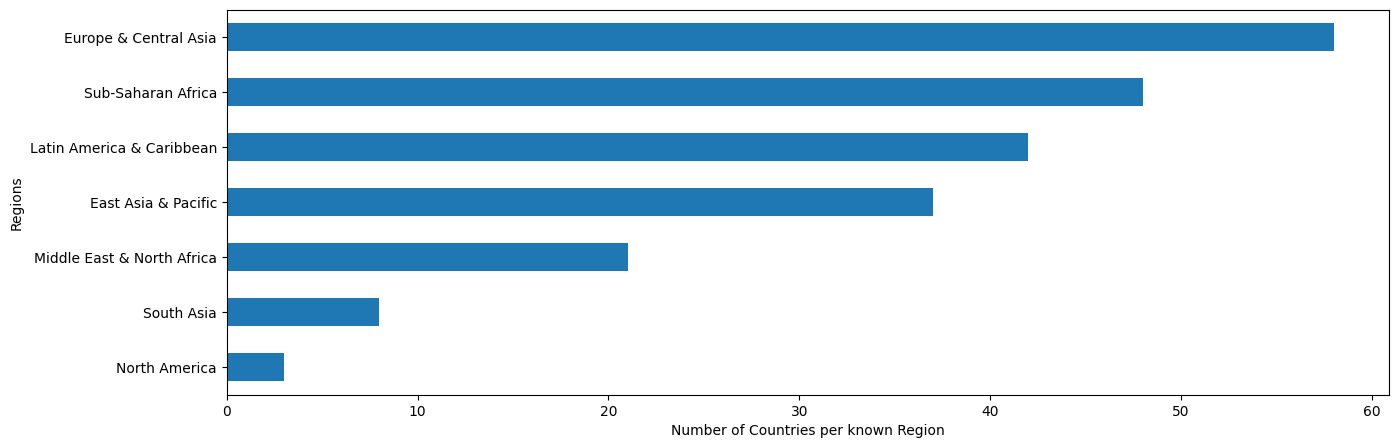

In [35]:
# Distribution of countries per region
df_bar = countries_df.groupby(["Region"])["Country Code"].count()
df_bar = df_bar.sort_values(ascending = True) # Sorted values

df_bar.plot(
    kind="barh",  # Horizontal bar plot
    ylabel="Regions",  
    xlabel="Number of Countries per known Region", 
    figsize=(15, 5)  # Set width & height in inches
);

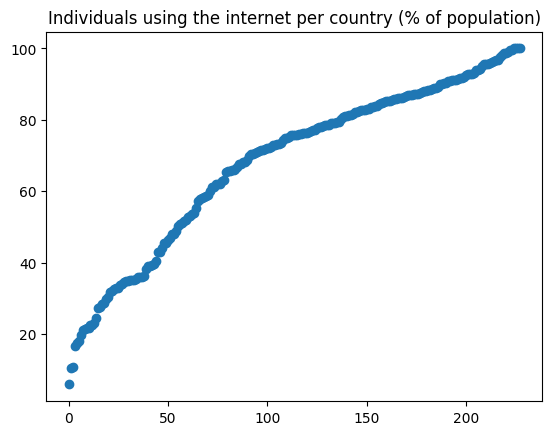

In [36]:
#Frequency distribution of individuals using the internet (% of population) per country
df_scatter = internet_df.sort_values(by='2021').reset_index()
plt.scatter(y=df_scatter['2021'], x=df_scatter.index)
plt.title("Individuals using the internet per country (% of population)")
plt.show()

Another way to see the previous distribution is using a boxplot chart:

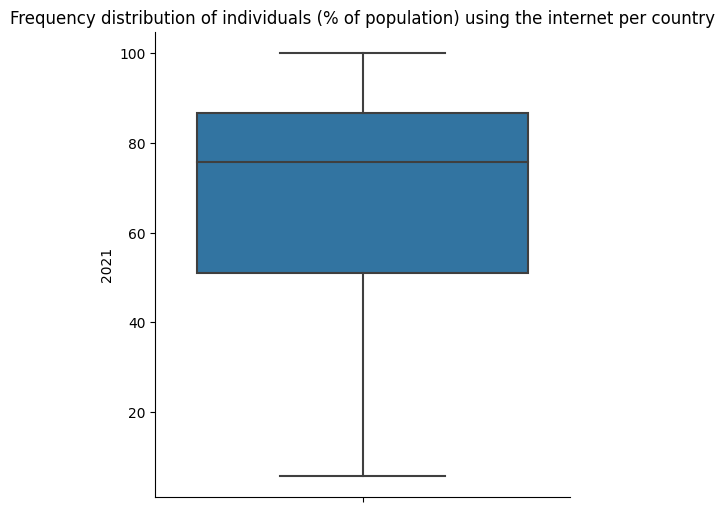

In [37]:
sns.catplot(y="2021", data=internet_df, kind="box")
plt.title("Frequency distribution of individuals (% of population) using the internet per country")
plt.show()

In [38]:
# Printing the median of % individuals using internet in 2021.
print(internet_df['2021'].median())

75.65135307


The line inside the blue box and the value above indicate that 50% of the countries in 2021 had more than 3/4 of their populations using the internet.

Before we progress, we can quickly check if there would be a correlation between Region and % of population that use the internet.

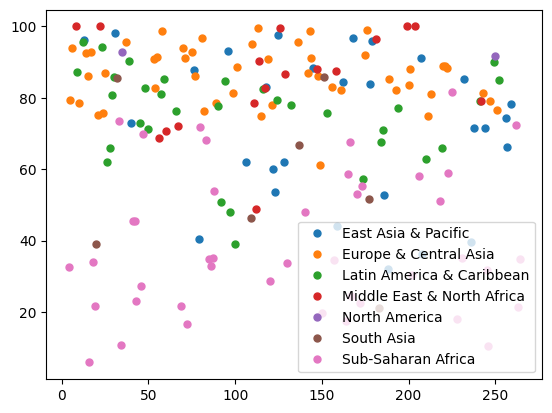

In [39]:
df_scatter = pd.merge(internet_df, countries_df, on=["Country Code"])
groups = df_scatter.groupby('Region')
for name, group in groups:
    plt.plot(group.index, group['2021'], marker='o', linestyle='', markersize=5, label=name)
plt.legend()
plt.show()

This visualization indicates that could be a correlation between some geographic regions and the % of internet users in their respective countries. For example, Sub-Saharan African countries tend to have a lower percentage of individuais using the internet than Europe & Central Asia countries.

# Data Wrangling

Our main question involves the relationship among internet users, rural population and access to electricity. So let's clean and merge our datasets into one.

We already know the most recent year with data availability in all datasets is 2020. We'll use this year for the analysis then.

In [40]:
# Merging Internet and Countries datasets.
main_df = pd.merge(internet_df, countries_df, on=["Country Code"])
# Selecting only the columns needed
main_df = main_df[['Country Name', 'Country Code','Region','IncomeGroup','2020']]
# Renaming the '% of individuals with internet access in 2020' column to simply 'Internet Access'
main_df.rename(columns={'2020': 'Internet Access'}, inplace=True)

In [41]:
# Merging the main dataset with the other datasets (% Rural population, % Population with Access to Electricity and % Rural population with Access to Electricity)
main_df = pd.merge(main_df, rural_df[['Country Code', '2020']], on=["Country Code"])
main_df.rename(columns={'2020': 'Rural Pop'}, inplace=True)
main_df = pd.merge(main_df, power_df[['Country Code', '2020']], on=["Country Code"])
main_df.rename(columns={'2020': 'Power Access'}, inplace=True)
main_df = pd.merge(main_df, rural_power_df[['Country Code', '2020']], on=["Country Code"])
main_df.rename(columns={'2020': 'Rural Power Access'}, inplace=True)

In [42]:
# Inspect the numeric columns
main_df.describe()

,Internet Access,Rural Pop,Power Access,Rural Power Access
count,233.000000,263.000000,263.000000,257.000000
mean,63.735610,39.515606,86.409443,81.505525
std,25.174885,22.646110,23.058315,30.390776
min,3.787954,0.000000,7.241338,0.932630
25%,43.489546,19.832970,82.810640,75.264854
50%,70.849971,39.301272,99.989196,100.000000
75%,84.599996,57.507608,100.000000,100.000000
max,100.000000,86.655000,100.000000,100.000000


Note that there are some null values in this dataset that could impact further statistical analysis, such as Regression models, and they should be dealt accordingly.

# Data Analysis

Let's jump to the question: can we identify correlations among the chosen variables?

Strong correlation coefficients (close to -1 or 1) will indicate that.

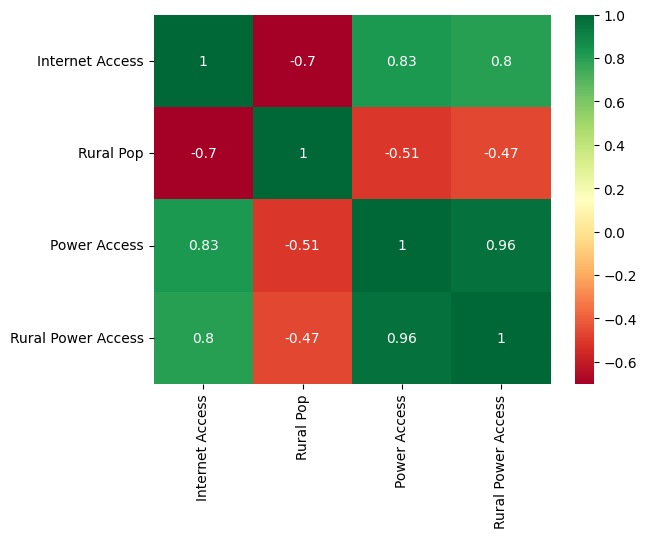

In [43]:
sns.heatmap(main_df.corr(), annot=True, cmap='RdYlGn')
plt.show()

As the aforementioned studies suggested, the percentage of individuals with internet access increases as there are more people with access to electricity (0.83 coefficient). In addition, the data also confirms that internet accessibility decreases in countries where more people live in rural areas (-0.7 coefficient).

In the EDA section, we also saw that countries grouped by geographic regions could also have some kind of correlation with Internet access by their populations. Let's see:

In [69]:
# Creating new numerical columns to indicate the Region (hot one encoding)
regions_df = main_df[['Internet Access']].join(pd.get_dummies(main_df['Region']))

In [80]:
# Calculating the Pearson's correlation coefficients between each region and Internet Access
for column in regions_df.loc[:, regions_df.columns != 'Internet Access']:
    pearson_coef = regions_df['Internet Access'].corr(regions_df[column])
    print("Correlation Coefficient between Internet Access and " + column + ": " + str(np.round(pearson_coef,2)))

Correlation Coefficient between Internet Access and East Asia & Pacific: 0.06
Correlation Coefficient between Internet Access and Europe & Central Asia: 0.42
Correlation Coefficient between Internet Access and Latin America & Caribbean: 0.13
Correlation Coefficient between Internet Access and Middle East & North Africa: 0.19
Correlation Coefficient between Internet Access and North America: 0.1
Correlation Coefficient between Internet Access and South Asia: -0.13
Correlation Coefficient between Internet Access and Sub-Saharan Africa: -0.59


Note that even the stronger correlation (value closer to 1 or -1), found between Internet Access and Sub-Saharan Africa (-0.59), is not more relevant than the ones previously found with Rural Population (-0.7), Power Access (0.83) and Rural Power Access (0.8). Therefore, a country's region is not a good characteristic to explain the country's Internet access when compared to these other variables.

# Conclusion

The facts informed by the articles referenced in the Introduction section are supported by the respective indicators available in the World Bank's data repositories. It is then correct to say that, to achieve sustainability goals impacted by Internet connectivity, rural populations and access to electricity are factors that should not be ignored.